In [12]:
import os
import mokapot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
sys.path
import data_loader as dl
import megascript_loader as ml

# Need to check the true and false thing here. 

# Making our Figure with Your Data - a tutorial

This notebook describes how you can compare data from an algorithm to output for algorithms that have been previously benchmarked. 

In order to compare your program's output to our benchmarked data, you will need to run the same raw files  through your algorithm. Begin by downloading six 2ng and six 0.2ng files from MassIVE (MSV000087689). Run these through your program and save the files. 

To accuratly run your files against ours, each file will need to have a "scan", "decoy", "peptide", and some type of probability column.
- "scan" is the scan number column . 
- "decoy" is a boolean column that tracks whether a scan was tagged as a decoy or not. True denotes a decoy, others wise it will be false.
- "peptide" is the column that has a string with the peptide found for each scan
- The probability column that presents the score/confidence that the tool gave to a specific scan. If your tool has a  qvalue or PEP value column, use this. All of the benchmarked data's probability column are scored on a scale where 0 is the best and 1 is the worst. You will want your data's probability column to be scaled this way as well. 


# Part 1 - Defining Your Variables

The first thing that you have to do is to tell us where your data lives, and then we can get about parsing it and working to make the figure. Once you have ran the raw files and saved the correctly formatted output files, insert the file paths into the correct spot in the input_files list below. Make sure that the right file is loaded into the right spot or your tool's output will not be correctly compared to the benchmarked data.

We will also ask you to type in the name of your probability column and the name of your tool.

Afterwards, we will take your data paths and put them into a list. This will make it easier for us to parse your data and make sure each file is compared to the right benchmarked files. 

In [2]:
#please fill in the actual file paths to each of these output files on your computer. Each of these files are
#the names of the raw files that you would have ran through your tool.

Ex_Auto_J3_30umTB_2ngQC_60m_1 = 'benchmark_test_file.csv'
Ex_Auto_J3_30umTB_2ngQC_60m_2 = 'benchmark_test_file.csv'
Ex_Auto_K13_30umTA_2ngQC_60m_1 = 'benchmark_test_file.csv'
Ex_Auto_K13_30umTA_2ngQC_60m_2 = 'benchmark_test_file.csv'
Ex_Auto_W17_30umTA_2ngQC_60m_3 = 'benchmark_test_file.csv'
Ex_Auto_W17_30umTA_2ngQC_60m_4 = 'benchmark_test_file.csv'

Ex_Auto_J3_30umTB_02ngQC_60m_1 = 'benchmark_test_file.csv'
Ex_Auto_J3_30umTB_02ngQC_60m_2 = 'benchmark_test_file.csv'
Ex_Auto_K13_30umTA_02ngQC_60m_1 = 'benchmark_test_file.csv'
Ex_Auto_K13_30umTA_02ngQC_60m_2 = 'benchmark_test_file.csv'
Ex_Auto_W17_30umTA_02ngQC_60m_3 = 'benchmark_test_file.csv'
Ex_Auto_W17_30umTA_02ngQC_60m_4 = 'benchmark_test_file.csv'

In [3]:
#Type in the name of your probability column and your tool. Afterwards, run the cell. 

#probability_column = "put your probabiliy column name here" 
#tool_name = "type the name of your tool"

probability_column = "probability" #delete
tool_name = "New_Tool" #Delete

In [4]:
#Here we are simply storing your file paths into a dictionary. This will help us to make sure we compare
#your data to the correctly benchmarked files. There is nothing you need to edit here. Simply run the cell.

input_files = {} 
    #2ng files
input_files["2ng_rep1"] = Ex_Auto_J3_30umTB_2ngQC_60m_1
input_files["2ng_rep2"] = Ex_Auto_J3_30umTB_2ngQC_60m_2
input_files["2ng_rep3"] = Ex_Auto_K13_30umTA_2ngQC_60m_1
input_files["2ng_rep4"] = Ex_Auto_K13_30umTA_2ngQC_60m_2
input_files["2ng_rep5"] = Ex_Auto_W17_30umTA_2ngQC_60m_3
input_files["2ng_rep6"] = Ex_Auto_W17_30umTA_2ngQC_60m_4

    #0.2ng files
input_files["0.2ng_rep1"] = Ex_Auto_J3_30umTB_02ngQC_60m_1
input_files["0.2ng_rep2"] = Ex_Auto_J3_30umTB_02ngQC_60m_2
input_files["0.2ng_rep3"] = Ex_Auto_K13_30umTA_02ngQC_60m_1
input_files["0.2ng_rep4"] = Ex_Auto_K13_30umTA_02ngQC_60m_2
input_files["0.2ng_rep5"] = Ex_Auto_W17_30umTA_02ngQC_60m_3
input_files["0.2ng_rep6"] = Ex_Auto_W17_30umTA_02ngQC_60m_4


# Part 2 - Parse Your Data Into A Dataframe. 

Below we are going to take your input files and get them into a data frames. Each dataframe that we make will be saved. 

Our filter function will drop any scans that have been flagged as decoys. We will also ensure that you do not have any duplicate scan numbers. 

In [5]:
#No changes need to be made here. Please just run the cell. 

formatted_files = ml.filter_input(input_files, probability_column) 

In [6]:
input_files

{'2ng_rep1': 'benchmark_test_file.csv',
 '2ng_rep2': 'benchmark_test_file.csv',
 '2ng_rep3': 'benchmark_test_file.csv',
 '2ng_rep4': 'benchmark_test_file.csv',
 '2ng_rep5': 'benchmark_test_file.csv',
 '2ng_rep6': 'benchmark_test_file.csv',
 '0.2ng_rep1': 'benchmark_test_file.csv',
 '0.2ng_rep2': 'benchmark_test_file.csv',
 '0.2ng_rep3': 'benchmark_test_file.csv',
 '0.2ng_rep4': 'benchmark_test_file.csv',
 '0.2ng_rep5': 'benchmark_test_file.csv',
 '0.2ng_rep6': 'benchmark_test_file.csv'}

Now let's just look at one of your dfs/tables to make sure everying parsed correctly.
You should have a scan and a peptide column as well as the column that you chose for the probability. 

In [7]:
#No need to change anything, simply run the cell to view one of your dataframes.

formatted_files["2ng_rep1"]

,scan,peptide,probability


# Part 3 - Make the MegaTables
For each raw file, we will join your output with our output data into a megatable. This will allow you to see what your tools scans are finding relative to the tools that we benchamarked.
To make the megascripts we will first read in our output for a specific raw file. We will then take our output and join your data to make the megascript. 

Each of the megascript will be saved as "benchmark_MegaScript_" + file name + ".csv". The file name correlates to the name of the raw files. For example, if you want to look at all the data that came from the Ex_Auto_J3_30umTB_2ngQC_60m_1 file, we can view that megascript by reading in the "benchmark_MegaScript_Ex_Auto_J3_30umTB_2ngQC_60m_1.csv" file.




In [8]:
#You do not need to input anything. Run the cell to make all your megascripts. 

ml.make_megascript(formatted_files, tool_name)

We will look at one of our final megatables. You will see that there are 2 levels of heading for our megatable. We can see the probability and peptide that was found for each algorithm at a scan number. At scans where the algorithm did have an output for that scan number, the table will simply have "Nan". There will be spots where some tools do not have values and others did. 

Note: when saving a multiindexed dataframe to a .csv file, the format is not fully saved. We have to do some formatting to get it to look the way it was originally. 

In [9]:
#Formatting the megatable after it is read in from the csv.
#Running this cell will take care of all the formatting; you do not need to change anything. 

df = pd.read_csv("benchmark_MegaScript_2ng_rep1.csv", header=[0,1])
df = df.drop("Unnamed: 0_level_0", axis = 1, level = 0)
df = df.rename(columns={'Unnamed: 1_level_1': " "})
df

scan      MsFragger                                           MsgfPlus  \
                   peptide Updated_probability                        peptide   
0         5            NaN                 NaN  QSKSEHETSDAKKSVEDRGKRCPTPEIQK   
1         7            NaN                 NaN                            NaN   
2         8            NaN                 NaN      CTMAPFWAHSDPEEM+15.995QWR   
3        11            NaN                 NaN               RTEDCGHCDFCRDMKK   
4        13            NaN                 NaN                            NaN   
...     ...            ...                 ...                            ...   
41802  9990  LDDPSCPRPECYR              0.0000                            NaN   
41803  9991       SDPVVSYR              0.0024                            NaN   
41804  9992      DTQEVPLEK              0.0022                            NaN   
41805  9994       RLEFENQK              0.3401                            NaN   
41806  9999      LGVTANDVK              0.0003                            NaN   

                MetaMorpheus                            MaxQuant           \
         QValue      peptide QValue PEP                  peptide      PEP   
0      0.086185          NaN    NaN NaN     SSKAYYVLSDAAMSLQKYGR  3.24090   
1           NaN          NaN    NaN NaN  LSLLVAQEVTRLLDILGLTLVMK  5.57320   
2      0.307555          NaN    NaN NaN           ELIVLLLVAAAHLR  0.45389   
3      0.303415          NaN    NaN NaN                      NaN      NaN   
4           NaN          NaN    NaN NaN               MMQCVLHVYK  0.11660   
...         ...          ...    ...  ..                      ...      ...   
41802       NaN          NaN    NaN NaN                      NaN      NaN   
41803       NaN          NaN    NaN NaN                      NaN      NaN   
41804       NaN          NaN    NaN NaN                      NaN      NaN   
41805       NaN          NaN    NaN NaN                      NaN      NaN   
41806       NaN          NaN    NaN NaN                      NaN      NaN   

      New_Tool              
       peptide probability  
0          NaN         NaN  
1          NaN         NaN  
2          NaN         NaN  
3          NaN         NaN  
4          NaN         NaN  
...        ...         ...  
41802      NaN         NaN  
41803      NaN         NaN  
41804      NaN         NaN  
41805      NaN         NaN  
41806      NaN         NaN  

[41807 rows x 12 columns]

# Part 4 - Make the Graphs
We will now make the graphs that will show us how many PSMs at or below our 1% FDR cutoff each tool is finding for the relative raw files. We will make one graph for all the 2ng files and another for all the 0.2ng files. 

The graphs will save to your computer as '2ng_native_score.png' and '0.2ng_native_score.png'

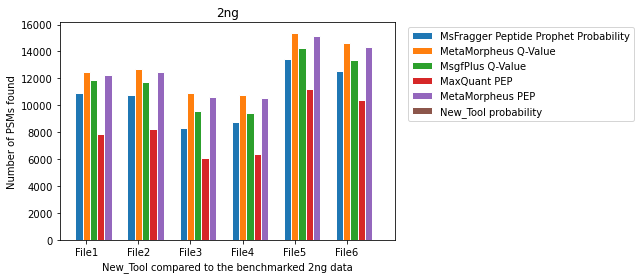

In [10]:
#This cell makes the 2ng graph. Please just run this cell, there is no need to change anything.

ml.make_2ng_graph(probability_column, tool_name) 

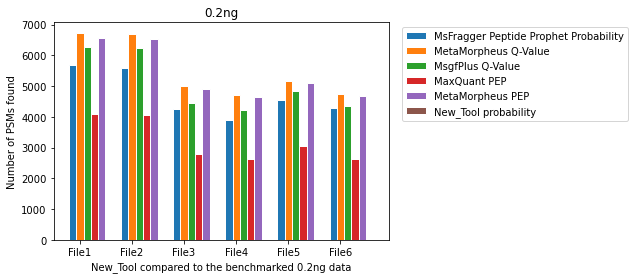

In [11]:
#This cell makes the 0.2ng graph. Please just run this cell, there is no need to change anything.

ml.make_02ng_graph(probability_column, tool_name)